In [270]:
import pandas as pd
import numpy as np

<h1 align='center'>Обработка данных</h1>

## Загрузка данных

In [398]:
feat = pd.read_csv('data/raw/players_feats.csv')
feat.head()

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,...,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_name,map_id
0,4954,90,42.2,112,0.80,76.3,5.9,6,156,0.58,...,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635
1,5794,45,60.0,57,0.79,82.3,10.9,3,68,0.66,...,96,54,34,1.59,1.17,70.4,16.7,7532,Ancient,635
2,4954,156,51.9,167,0.93,63.5,3.4,10,265,0.59,...,22,26,19,1.37,1.10,88.5,20.5,6665,Dust2,583
3,5794,449,53.5,427,1.05,86.7,13.1,23,618,0.73,...,104,62,49,1.27,1.10,79.0,17.4,7532,Dust2,583
4,7998,173,32.9,130,1.33,82.4,2.9,9,225,0.77,...,19,27,25,1.08,1.08,81.5,16.2,4608,Dust2,439


In [399]:
train = pd.read_csv('data/raw/train.csv')
train.head()

,index,map_id,team1_id,team2_id,map_name,who_win
0,0,289,6665,7718,Ancient,0
1,1,715,4411,10577,Inferno,0
2,2,157,11251,9455,Nuke,1
3,3,524,4608,7532,Mirage,0
4,4,404,8637,6667,Overpass,1


In [400]:
test = pd.read_csv('data/raw/test.csv')
test.head()

,index,map_id,team1_id,team2_id,map_name
0,713,309,5973,5752,Dust2
1,714,541,5973,5752,Vertigo
2,715,1,8297,7020,Nuke
3,716,392,8297,7020,Mirage
4,717,684,8297,7020,Overpass


## Мёрдж данных

In [348]:
def merge_csv(data, feat):
    # Team 1
    df = data.merge(feat, left_on=['map_id', 'team1_id'], 
                 right_on=['map_id', 'team_id'], 
                 suffixes=('', '_y'), how='inner').drop(['map_name_y', 'team_id'], axis=1)
    # Team 2
    df = df.merge(feat, left_on=['map_id', 'team2_id'], 
              right_on=['map_id', 'team_id'], 
              how='inner', suffixes=('_t1', '_t2')).drop(['map_name_t2', 'team_id'], axis=1)
    # Rename 
    df = df.rename(columns={'map_name_t1': 'map_name'}).reset_index(drop=True)
    return df

In [349]:
train = merge_csv(train, feat)
test = merge_csv(test, feat)
train.shape

(713, 255)

In [352]:
train

,map_id,team1_id,team2_id,map_name,who_win,p1_id_t1,p1_total_kills_t1,p1_headshots_t1,p1_total_deaths_t1,p1_kd_ratio_t1,...,p5_kill_death_t2,p5_kill_round_t2,p5_rounds_with_kills_t2,p5_kill_death_difference_t2,p5_total_opening_kills_t2,p5_total_opening_deaths_t2,p5_opening_kill_ratio_t2,p5_opening_kill_rating_t2,p5_team_win_percent_after_first_kill_t2,p5_first_kill_in_won_rounds_t2
0,289,6665,7718,Ancient,0,4954,258,36.0,293,0.88,...,0.75,0.55,75,-34,21,20,1.05,1.06,76.2,19.0
1,715,4411,10577,Inferno,0,8611,178,39.3,208,0.86,...,1.43,0.78,197,90,64,25,2.56,1.39,75.0,23.3
2,157,11251,9455,Nuke,1,7938,494,52.8,397,1.24,...,0.81,0.55,101,-32,32,35,0.91,1.09,53.1,15.5
3,524,4608,7532,Mirage,0,7998,474,29.1,304,1.56,...,0.92,0.54,109,-13,15,21,0.71,0.82,73.3,7.9
4,404,8637,6667,Overpass,1,2898,217,55.8,248,0.88,...,1.17,0.72,122,26,20,10,2.00,1.01,80.0,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,709,6667,4773,Inferno,0,429,320,47.8,396,0.81,...,1.14,0.72,139,24,35,29,1.21,1.12,57.1,13.8
709,528,9215,5995,Ancient,1,11154,203,50.2,131,1.55,...,0.00,0.00,0,0,0,0,0.00,0.00,0.0,0.0
710,163,4869,9565,Mirage,1,922,447,44.3,538,0.83,...,0.85,0.56,168,-43,29,36,0.81,0.87,69.0,10.2
711,96,10426,4991,Nuke,1,973,499,43.1,472,1.06,...,1.20,0.74,239,59,36,40,0.90,0.90,86.1,12.7


In [351]:
test

,index,map_id,team1_id,team2_id,map_name,p1_id_t1,p1_total_kills_t1,p1_headshots_t1,p1_total_deaths_t1,p1_kd_ratio_t1,...,p5_kill_death_t2,p5_kill_round_t2,p5_rounds_with_kills_t2,p5_kill_death_difference_t2,p5_total_opening_kills_t2,p5_total_opening_deaths_t2,p5_opening_kill_ratio_t2,p5_opening_kill_rating_t2,p5_team_win_percent_after_first_kill_t2,p5_first_kill_in_won_rounds_t2
0,713,309,5973,5752,Dust2,7687,105,53.3,108,0.97,...,0.97,0.67,142,-5,44,33,1.33,1.24,70.5,18.9
1,714,541,5973,5752,Vertigo,7687,230,42.2,243,0.95,...,0.89,0.62,125,-21,44,50,0.88,1.14,77.3,21.0
2,715,1,8297,7020,Nuke,12521,270,42.6,334,0.81,...,1.33,0.83,17,6,3,2,1.50,1.07,66.7,15.4
3,716,392,8297,7020,Mirage,12521,299,40.1,318,0.94,...,0.00,0.00,0,0,0,0,0.00,0.00,0.0,0.0
4,717,684,8297,7020,Overpass,12521,127,42.5,139,0.91,...,1.43,0.80,13,6,4,2,2.00,1.33,100.0,25.0
5,718,85,4494,4411,Vertigo,9115,247,42.1,270,0.91,...,0.94,0.60,141,-13,26,27,0.96,0.92,80.8,12.7
6,719,314,4494,4411,Inferno,9115,300,52.0,358,0.84,...,0.98,0.57,141,-4,21,29,0.72,0.83,85.7,10.2
7,720,403,4494,4411,Mirage,9115,242,51.2,322,0.75,...,1.01,0.61,136,1,13,19,0.68,0.78,76.9,6.6
8,721,125,4608,7718,Inferno,7998,298,46.6,221,1.35,...,0.78,0.51,136,-55,28,23,1.22,0.93,82.1,11.5
9,722,241,4608,7718,Mirage,7998,525,32.2,340,1.54,...,0.95,0.59,124,-10,24,39,0.62,0.84,91.7,13.5


In [350]:
test.shape

(30, 255)

## Подготовка данных

In [276]:
def clear_data(df):
    drop_id = [col for col in df.columns if 'id' in col.lower() and 'team' not in col.lower()]
    df = df.drop(columns=drop_id, axis=1).fillna(0)
    return df

train = clear_data(train)

In [277]:
y = train['who_win'].values
X = train.drop(columns=(['who_win']), axis=1)
X.head()

,team1_id,team2_id,map_name,p1_total_kills_t1,p1_headshots_t1,p1_total_deaths_t1,p1_kd_ratio_t1,p1_damage_per_round_t1,p1_grenade_damage_per_round_t1,p1_maps_played_t1,...,p5_kill_death_t2,p5_kill_round_t2,p5_rounds_with_kills_t2,p5_kill_death_difference_t2,p5_total_opening_kills_t2,p5_total_opening_deaths_t2,p5_opening_kill_ratio_t2,p5_opening_kill_rating_t2,p5_team_win_percent_after_first_kill_t2,p5_first_kill_in_won_rounds_t2
0,6665,7718,Ancient,258,36.0,293,0.88,71.1,6.3,17,...,0.75,0.55,75,-34,21,20,1.05,1.06,76.2,19.0
1,4411,10577,Inferno,178,39.3,208,0.86,64.1,6.5,12,...,1.43,0.78,197,90,64,25,2.56,1.39,75.0,23.3
2,11251,9455,Nuke,494,52.8,397,1.24,94.0,5.8,22,...,0.81,0.55,101,-32,32,35,0.91,1.09,53.1,15.5
3,4608,7532,Mirage,474,29.1,304,1.56,86.9,2.4,18,...,0.92,0.54,109,-13,15,21,0.71,0.82,73.3,7.9
4,8637,6667,Overpass,217,55.8,248,0.88,64.8,4.6,14,...,1.17,0.72,122,26,20,10,2.00,1.01,80.0,12.4


In [278]:
categorical_features = X.select_dtypes(include='object').columns
numeric_features = X.select_dtypes(exclude='object').columns

In [279]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [280]:
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features),
    # ('other', 'passthrough', other)
])

In [281]:
column_transformer.fit(X)

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['map_name'], dtype='object')),
                                ('scaling', StandardScaler(),
                                 Index(['team1_id', 'team2_id', 'p1_total_kills_t1', 'p1_headshots_t1',
       'p1_total_deaths_t1', 'p1_kd_ratio_t1', 'p1_damage_per_round_t1',
       'p1_grenade_damage_per_round_t1', 'p1_maps_played_t1',
       'p1_rounds_played_t1',
       ...
       'p5_kill_death_t2', 'p5_kill_round_t2', 'p5_rounds_with_kills_t2',
       'p5_kill_death_difference_t2', 'p5_total_opening_kills_t2',
       'p5_total_opening_deaths_t2', 'p5_opening_kill_ratio_t2',
       'p5_opening_kill_rating_t2', 'p5_team_win_percent_after_first_kill_t2',
       'p5_first_kill_in_won_rounds_t2'],
      dtype='object', length=242))])

In [282]:
X = pd.DataFrame(column_transformer.transform(X), columns=column_transformer.get_feature_names_out())
X

,onehot__map_name_Ancient,onehot__map_name_Dust2,onehot__map_name_Inferno,onehot__map_name_Mirage,onehot__map_name_Nuke,onehot__map_name_Overpass,onehot__map_name_Vertigo,scaling__team1_id,scaling__team2_id,scaling__p1_total_kills_t1,...,scaling__p5_kill_death_t2,scaling__p5_kill_round_t2,scaling__p5_rounds_with_kills_t2,scaling__p5_kill_death_difference_t2,scaling__p5_total_opening_kills_t2,scaling__p5_total_opening_deaths_t2,scaling__p5_opening_kill_ratio_t2,scaling__p5_opening_kill_rating_t2,scaling__p5_team_win_percent_after_first_kill_t2,scaling__p5_first_kill_in_won_rounds_t2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.264084,-0.030150,0.133470,...,-0.746071,-0.422023,-0.634188,-1.378115,-0.330242,-0.282090,-0.060462,0.380147,0.349306,0.843862
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.292774,1.204009,-0.488468,...,1.312929,0.772034,0.905672,2.293592,1.933317,0.017657,2.527803,1.470805,0.296564,1.506923
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.828894,0.719669,1.968190,...,-0.564395,-0.422023,-0.306021,-1.318894,0.248808,0.617151,-0.300433,0.479298,-0.665991,0.304162
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.202866,-0.110442,1.812705,...,-0.231321,-0.473939,-0.205047,-0.756294,-0.646088,-0.222141,-0.643250,-0.413058,0.221845,-0.867760
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.635906,-0.483840,-0.185273,...,0.525664,0.460541,-0.040963,0.398517,-0.382883,-0.881584,1.567917,0.214896,0.516325,-0.173859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.263171,-1.301433,0.615473,...,0.434826,0.460541,0.173607,0.339296,0.406730,0.257454,0.213792,0.578449,-0.490182,0.042021
709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.899696,-0.773926,-0.294112,...,-3.017028,-3.277378,-1.580824,-0.371357,-1.435702,-1.481078,-1.860248,-3.123178,-2.999855,-2.085942
710,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.083750,0.767154,1.602801,...,-0.443277,-0.370108,0.539640,-1.644610,0.090885,0.677100,-0.471841,-0.247807,0.032850,-0.513100
711,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.452377,-1.207328,2.007061,...,0.616503,0.564372,1.435788,1.375665,0.459371,0.916898,-0.317574,-0.148657,0.784434,-0.127599


In [283]:
# X_test = pd.DataFrame(column_transformer.transform(X_test), columns=column_transformer.get_feature_names_out())
# X_test

### Features Enginering

In [284]:
import numpy as np
import pandas as pd
import pickle

from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [285]:
matplotlib.rcParams.update({'font.size': 12})

In [286]:
def apply_elbow_method(X, K=15):
    distortions = []
    K = range(2,K)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=33).fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [287]:
def display_clusters_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))
    plt.bar(unique, counts)
    plt.xlabel('Clгsters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    plt.show()

In [288]:
def reduce_dims_to_2D_space_with_PCA(df):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
    
def reduce_dims_to_3D_space_with_PCA(df):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])


def reduce_dims_to_2D_space_with_TSNE(df):
    tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
   
    
def reduce_dims_to_3D_space_with_TSNE(df):
    tsne = TSNE(n_components=3, learning_rate=250, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])  

In [289]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=labels.name, cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(15,10))
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=(15,10))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

    
def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    plt.title('3D mapping of objects')
    plt.show()

In [290]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10)) 
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

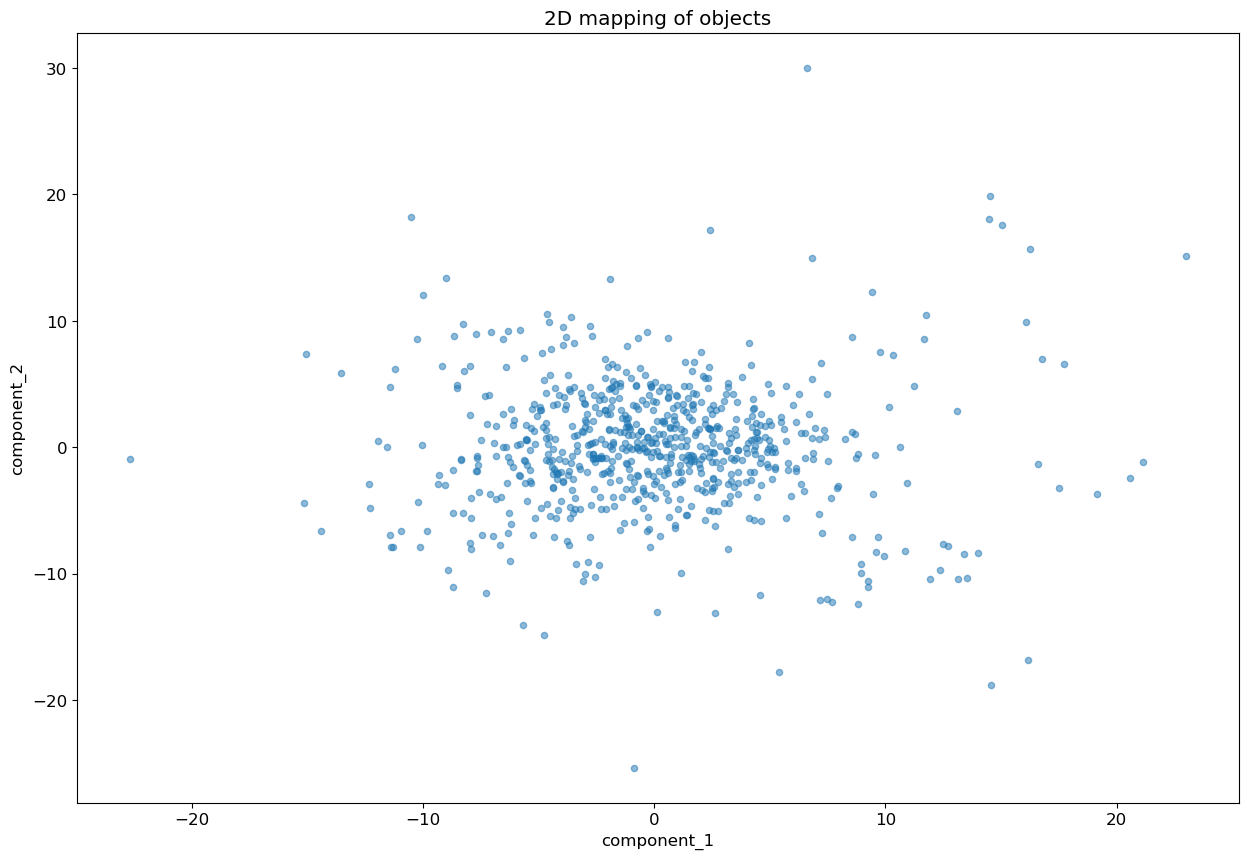

In [291]:
components_2d = reduce_dims_to_2D_space_with_PCA(X)
display_components_in_2D_space(components_2d, pd.Series(y))

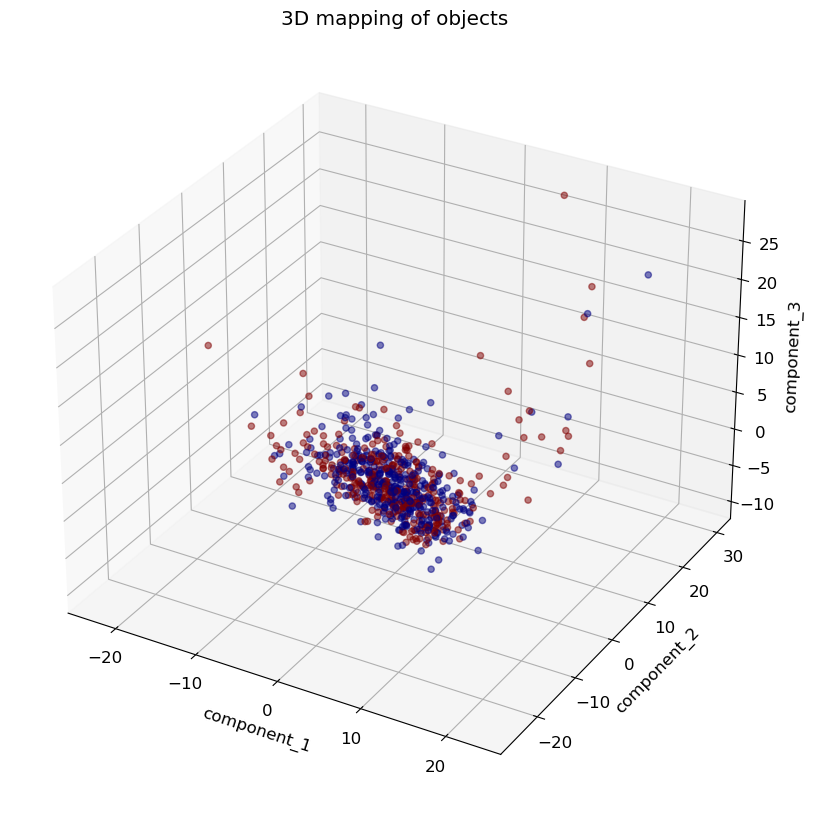

In [292]:
components_3d = reduce_dims_to_3D_space_with_PCA(X)
display_components_in_3D_space(components_3d, pd.Series(y))

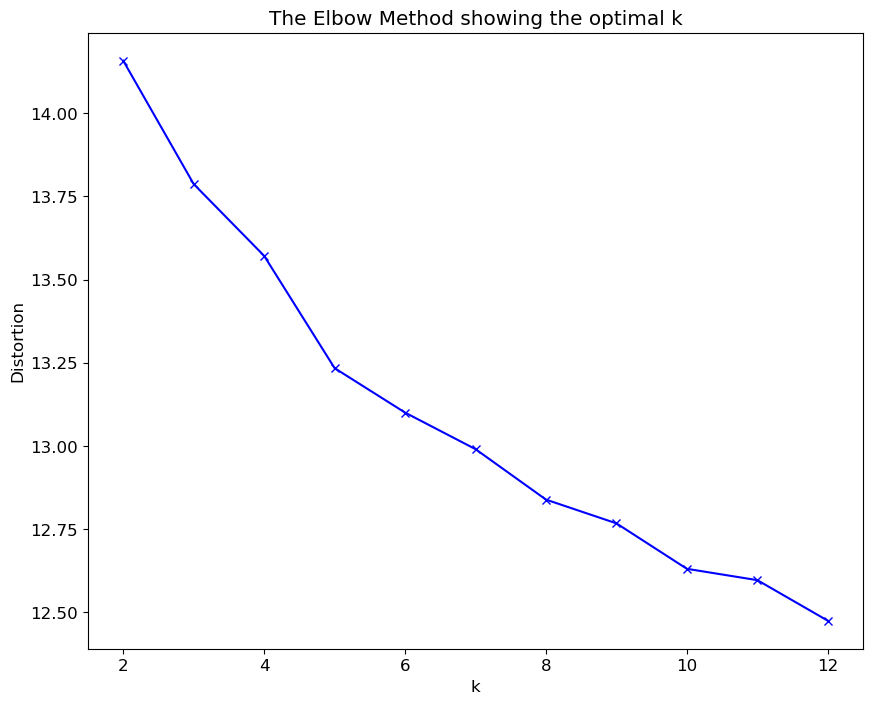

In [293]:
apply_elbow_method(X, K=13)

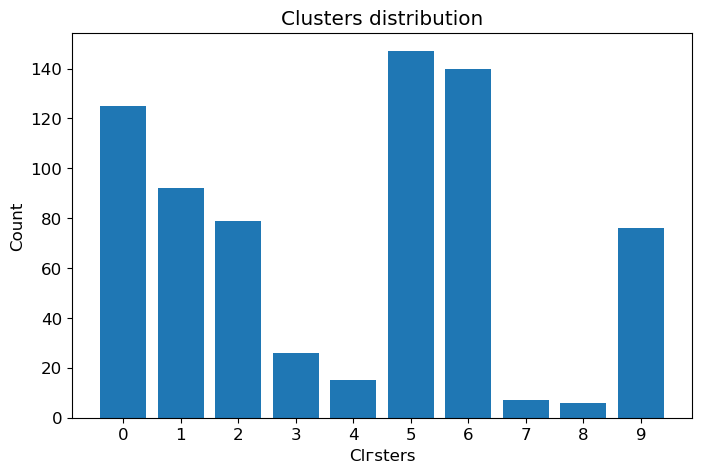

In [294]:
kmeans_10 = KMeans(n_clusters=10, random_state=33)
labels_clast_10 = kmeans_10.fit_predict(X)
labels_clast_10 = pd.Series(labels_clast_10, name='clusters_2')

unique, counts = np.unique(labels_clast_10, return_counts=True)
display_clusters_distribution(unique, counts)

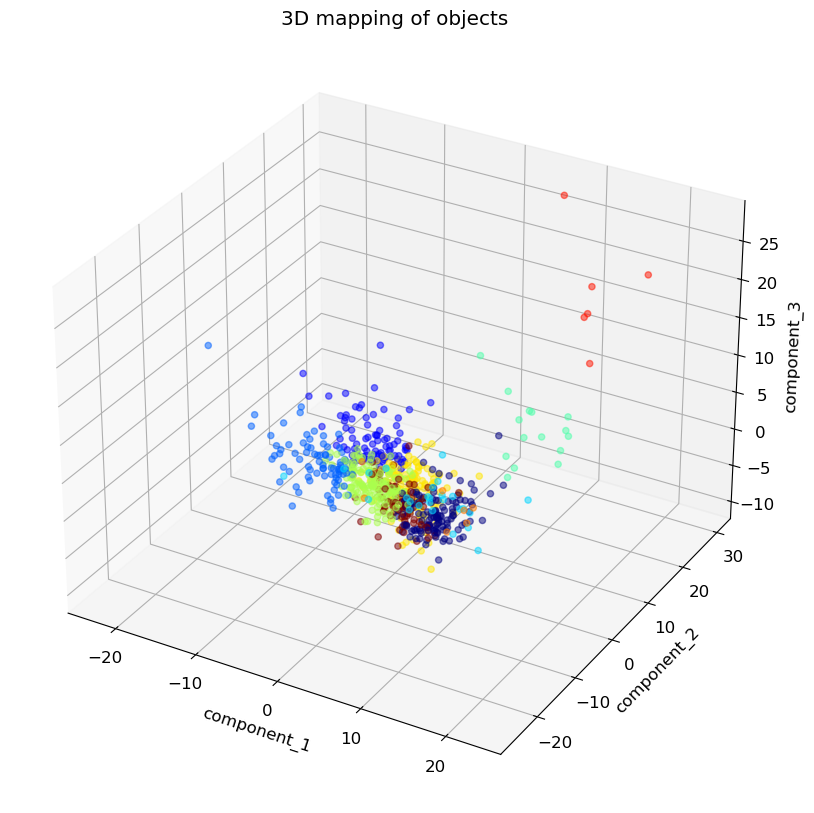

In [295]:
display_components_in_3D_space(components_3d, labels_clast_10)

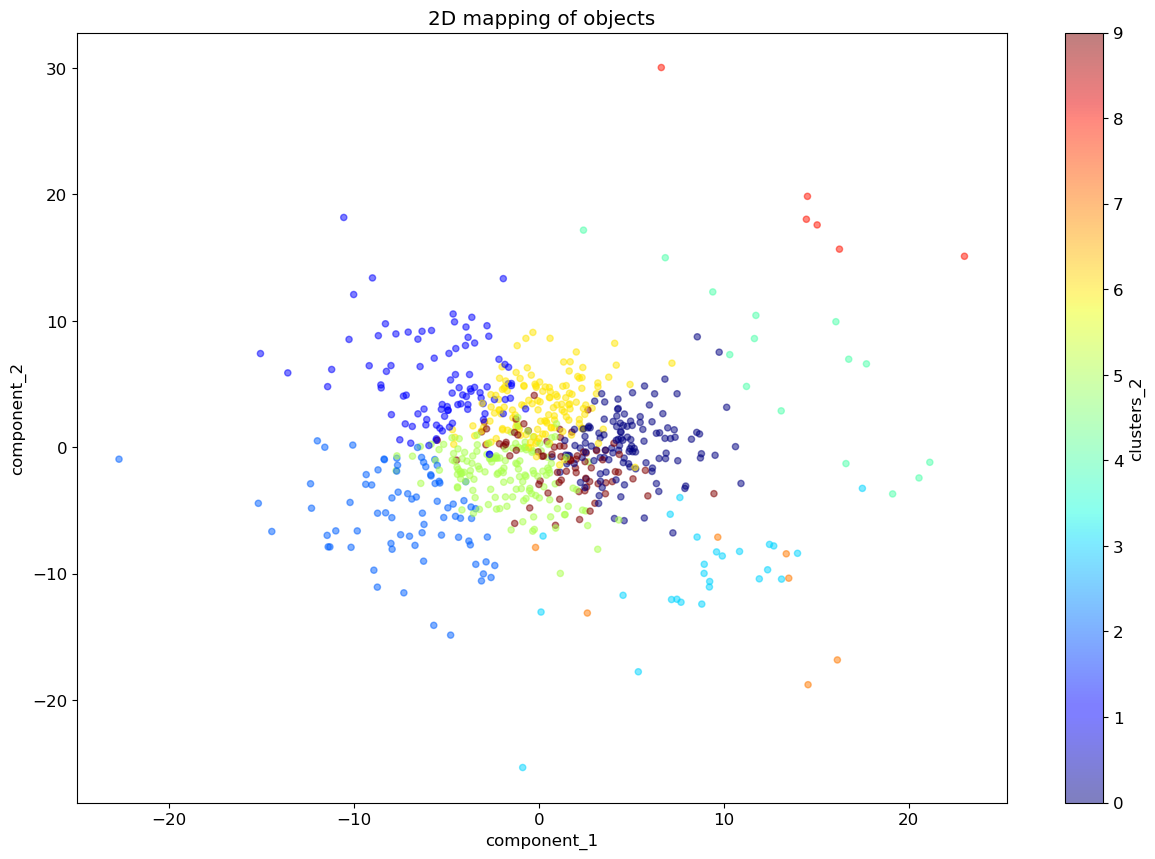

In [296]:
display_components_in_2D_space(components_2d, labels_clast_10)

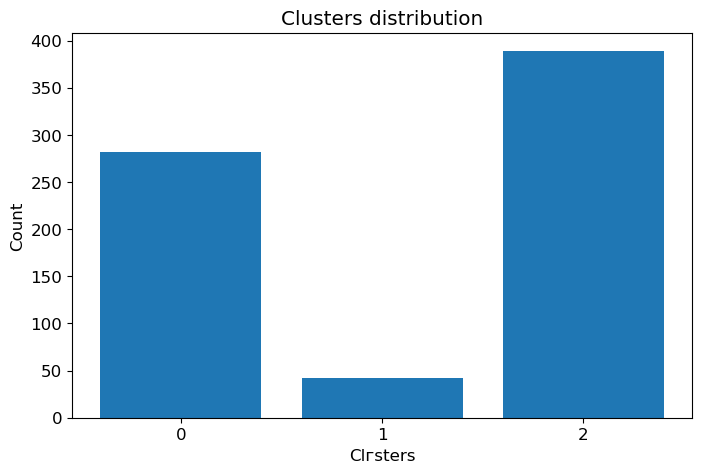

In [297]:
kmeans_3 = KMeans(n_clusters=3, random_state=33)
labels_clast_3 = kmeans_3.fit_predict(X)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

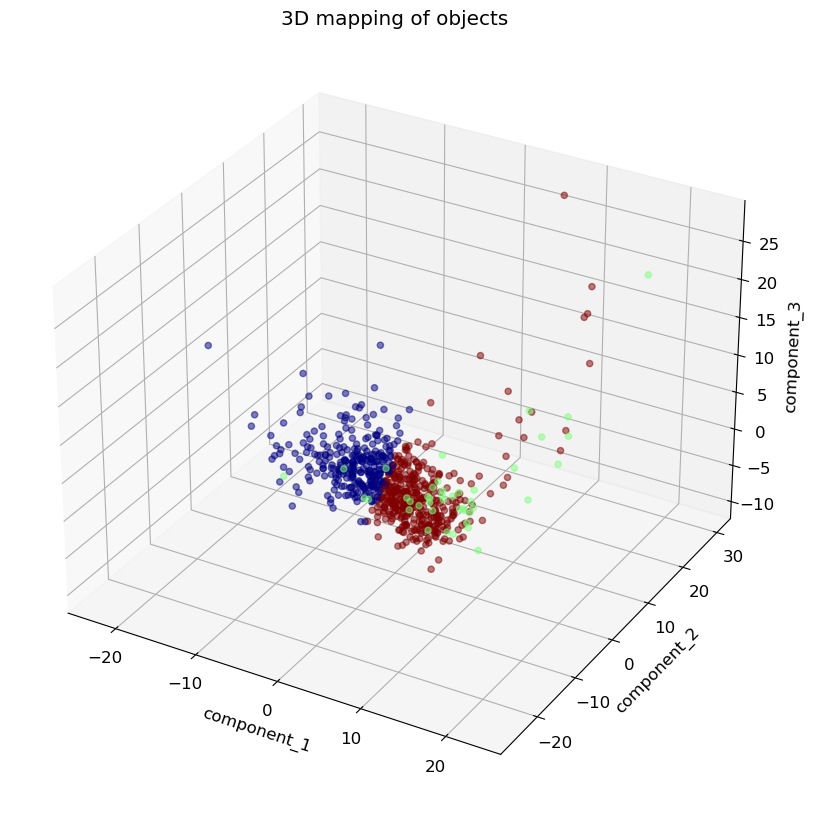

In [298]:
display_components_in_3D_space(components_3d, labels_clast_3)

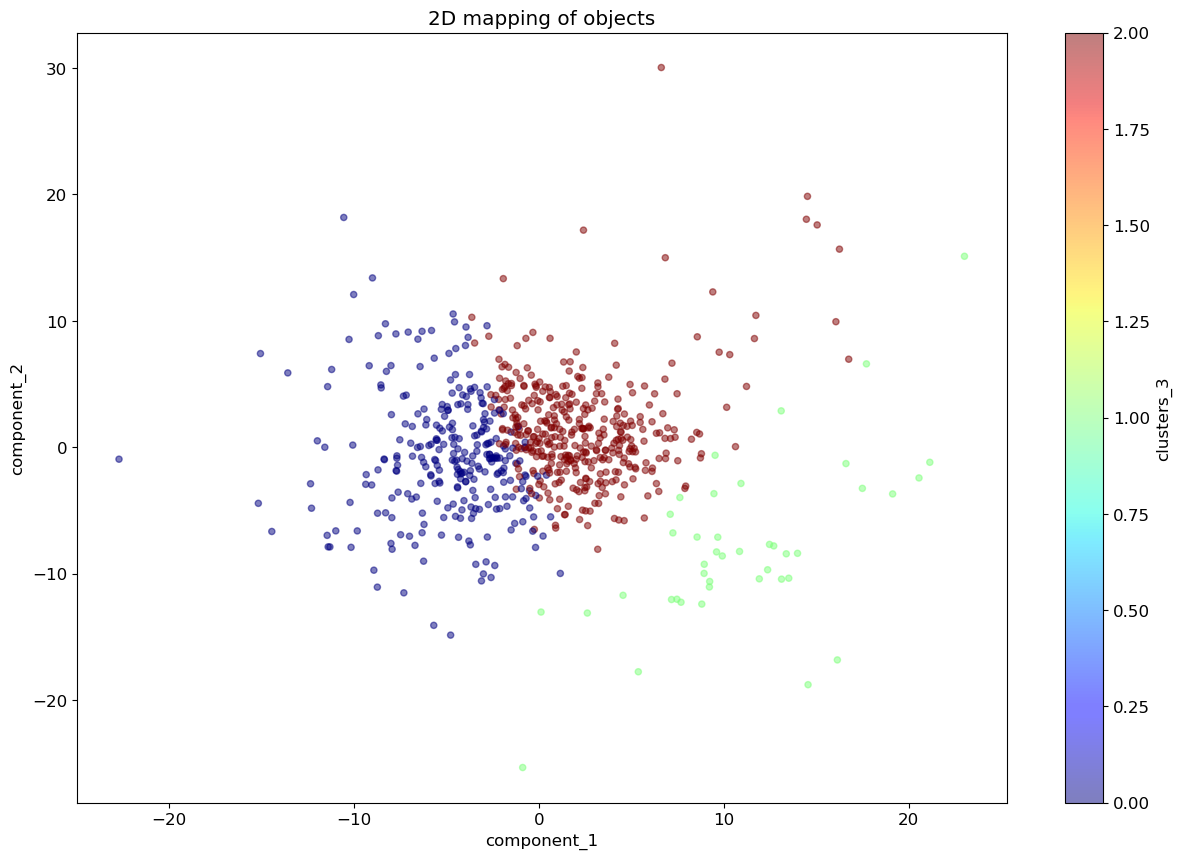

In [299]:
display_components_in_2D_space(components_2d, labels_clast_3)

In [300]:
clusters_3_dummies = pd.get_dummies(labels_clast_3, drop_first=True, prefix='clusters_3')
clusters_10_dummies = pd.get_dummies(labels_clast_10, drop_first=True, prefix='clusters_10')

df_ext = pd.concat([X, components_3d, clusters_3_dummies, clusters_10_dummies, pd.Series(y)], 
                   axis=1)

df_ext.head()

,onehot__map_name_Ancient,onehot__map_name_Dust2,onehot__map_name_Inferno,onehot__map_name_Mirage,onehot__map_name_Nuke,onehot__map_name_Overpass,onehot__map_name_Vertigo,scaling__team1_id,scaling__team2_id,scaling__p1_total_kills_t1,...,clusters_10_1,clusters_10_2,clusters_10_3,clusters_10_4,clusters_10_5,clusters_10_6,clusters_10_7,clusters_10_8,clusters_10_9,0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.264084,-0.030150,0.133470,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.292774,1.204009,-0.488468,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.828894,0.719669,1.968190,...,0,0,0,0,1,0,0,0,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.202866,-0.110442,1.812705,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.635906,-0.483840,-0.185273,...,0,0,0,0,0,0,0,0,0,1


In [301]:
X = df_ext.iloc[:, :-1]
y = df_ext.iloc[:, -1]

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

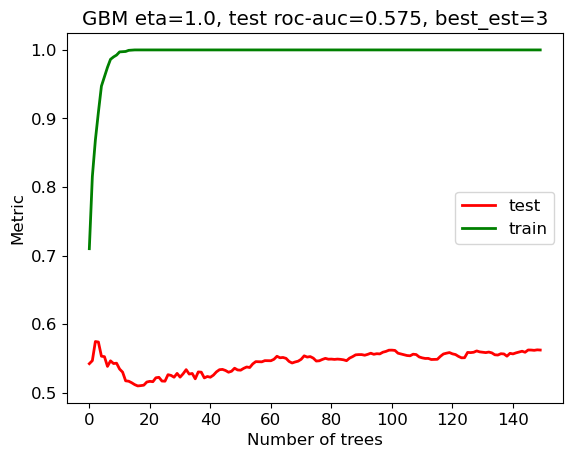

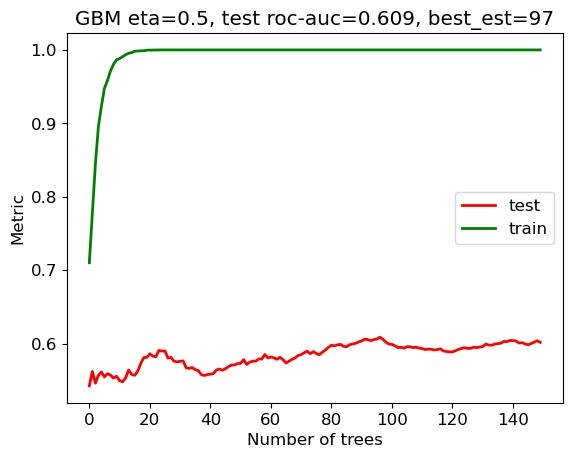

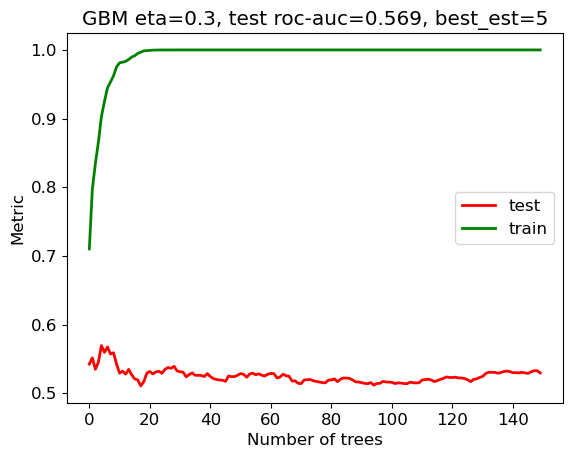

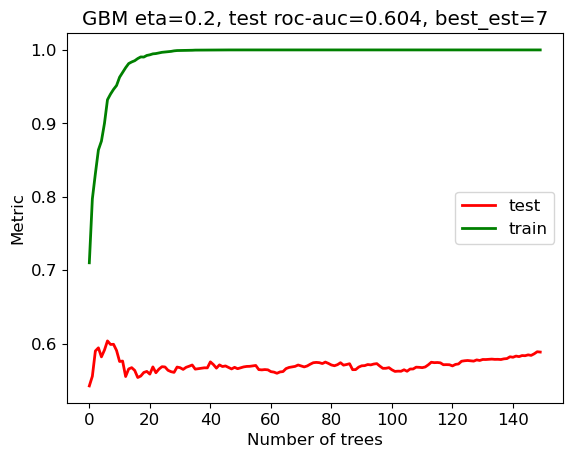

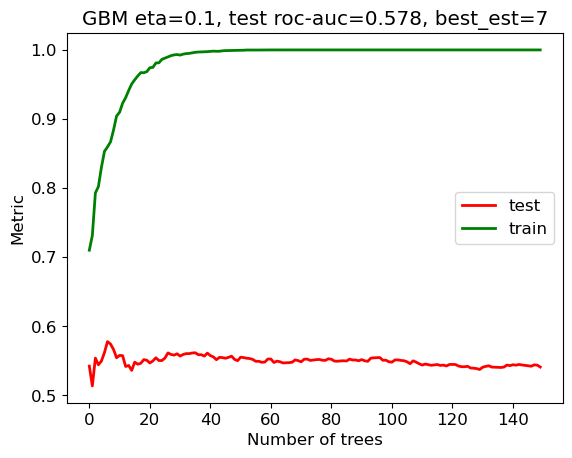

In [303]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:

    gbm = GradientBoostingClassifier(n_estimators=150, learning_rate=learning_rate, random_state=241).fit(X_train, y_train)
    
    l = roc_auc_score

    test_deviance = np.zeros((gbm.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbm.staged_decision_function(X_test)):
        y_pred = 1.0 / (1.0 + np.exp(-y_pred))
        test_deviance[i] = roc_auc_score(y_test, y_pred)
    
    train_deviance = np.zeros((gbm.n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(gbm.staged_decision_function(X_train)):
        y_pred = 1.0 / (1.0 + np.exp(-y_pred))
        train_deviance[i] = roc_auc_score(y_train, y_pred)

    plt.figure()
    plt.plot(test_deviance, 'r', linewidth=2)
    plt.plot(train_deviance, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    plt.title('GBM eta=%.1f, test roc-auc=%.3f, best_est=%d' % (learning_rate, test_deviance.max(), test_deviance.argmax()+1))
    plt.xlabel('Number of trees')
    plt.ylabel('Metric')

In [304]:
gbm = GradientBoostingClassifier(n_estimators=150, learning_rate=0.5, random_state=241).fit(X_train, y_train)

In [305]:
from sklearn.metrics import roc_auc_score

In [306]:
y_pred = gbm.predict(X_test)
print('ROC-AUC на валидации: ',
      roc_auc_score(y_test, y_pred))

ROC-AUC на валидации:  0.5685545040814852


In [307]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False).head(60)

,feature_name,importance
73,scaling__p3_rounds_with_kills_t1,0.035664
57,scaling__p3_total_kills_t1,0.029269
87,scaling__p4_maps_played_t1,0.026769
197,scaling__p3_opening_kill_ratio_t2,0.025629
151,scaling__p1_team_win_percent_after_first_kill_t2,0.022586
127,scaling__p5_team_win_percent_after_first_kill_t1,0.021880
119,scaling__p5_kill_death_t1,0.021517
218,scaling__p4_kill_death_difference_t2,0.020549
62,scaling__p3_grenade_damage_per_round_t1,0.019487
194,scaling__p3_kill_death_difference_t2,0.019405


## Lasso

In [308]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

Best alpha = 0.0006


D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.410e-01, tolerance: 1.770e-02
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'CV score')

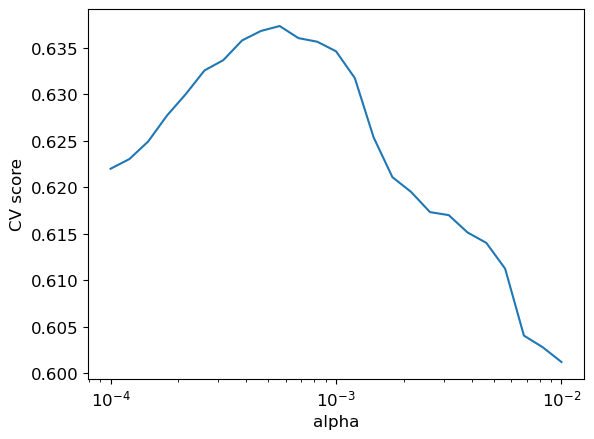

In [309]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, -2, 25)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}],
                        scoring="roc_auc", cv=10, n_jobs=-1)
searcher.fit(X, y)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [310]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# column_transformer = ColumnTransformer([
#     ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
#     ('scaling', StandardScaler(), numeric_features)
# ])

lasso_pipeline = Pipeline(steps=[
    # ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=best_alpha))
])

model = lasso_pipeline.fit(X_train[feature_importances[:].feature_name.values], y_train)
y_pred = model.predict(X_test[feature_importances[:].feature_name.values])
print("RMSE = %.4f" % roc_auc_score(y_test, y_pred))

RMSE = 0.5735


D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+00, tolerance: 1.184e-02
  model = cd_fast.enet_coordinate_descent(


In [311]:
# ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
# print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 50


In [312]:
new_X = X[X.columns[lasso_pipeline.steps[-1][-1].coef_ != 0]]
new_X

,onehot__map_name_Ancient,onehot__map_name_Dust2,onehot__map_name_Inferno,onehot__map_name_Mirage,onehot__map_name_Overpass,onehot__map_name_Vertigo,scaling__team1_id,scaling__team2_id,scaling__p1_headshots_t1,scaling__p1_total_deaths_t1,...,scaling__p5_team_win_percent_after_first_kill_t2,scaling__p5_first_kill_in_won_rounds_t2,component_1,clusters_3_2,clusters_10_1,clusters_10_2,clusters_10_3,clusters_10_5,clusters_10_6,clusters_10_9
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.264084,-0.030150,-0.902310,0.375615,...,0.349306,0.843862,1.601549,1,0,0,0,1,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,-1.292774,1.204009,-0.583209,-0.287154,...,0.296564,1.506923,-9.165584,0,1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.828894,0.719669,0.722206,1.186532,...,-0.665991,0.304162,-2.349861,0,0,0,0,1,0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,-1.202866,-0.110442,-1.569522,0.461385,...,0.221845,-0.867760,-4.604208,0,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.635906,-0.483840,1.012298,0.024737,...,0.516325,-0.173859,1.668441,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,0.0,0.0,1.0,0.0,0.0,0.0,-0.263171,-1.301433,0.238719,1.178735,...,-0.490182,0.042021,-6.105537,0,0,1,0,0,0,0
709,1.0,0.0,0.0,0.0,0.0,0.0,0.899696,-0.773926,0.470793,-0.887545,...,-2.999855,-2.085942,5.901669,1,0,0,0,0,0,1
710,0.0,0.0,0.0,1.0,0.0,0.0,-1.083750,0.767154,-0.099722,2.285949,...,0.032850,-0.513100,-11.385487,0,0,1,0,0,0,0
711,0.0,0.0,0.0,0.0,0.0,0.0,1.452377,-1.207328,-0.215759,1.771328,...,0.784434,-0.127599,-7.600882,0,0,1,0,0,0,0


# Модель

In [313]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, stratify=y, test_size=0.3, random_state=42)

In [315]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [316]:
def pr_auc_score(y_true, y_pred):
    precision, recall, thr = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

# Создадим скор функции, чтобы использовать ее в подборе параметра
pr_auc_scorer = make_scorer(pr_auc_score, greater_is_better=True)

In [317]:
def pr_auc_score(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

# Создадим скор функции, чтобы использовать ее в подборе параметра
pr_auc_scorer = make_scorer(pr_auc_score, greater_is_better=True)

In [318]:
for i, c_ in enumerate(np.logspace(-6, 0, 10)):
    svc = LinearSVC(max_iter=100000, C=c_) # .fit(X_train, y_train)
    
    result = np.mean(cross_val_score(svc,
                                     X=X_train,
                                     y=y_train,
                                     cv=KFold(n_splits=5),
                                     scoring=pr_auc_scorer))
    
    print(f'{i}) C={c_:6f},        AUC-PR={result:6f}')

0) C=0.000001,        AUC-PR=0.577894
1) C=0.000005,        AUC-PR=0.568242
2) C=0.000022,        AUC-PR=0.565606
3) C=0.000100,        AUC-PR=0.555018
4) C=0.000464,        AUC-PR=0.575447
5) C=0.002154,        AUC-PR=0.589668
6) C=0.010000,        AUC-PR=0.588902
7) C=0.046416,        AUC-PR=0.585780
8) C=0.215443,        AUC-PR=0.583501
9) C=1.000000,        AUC-PR=0.565582


In [319]:
from sklearn.linear_model import LogisticRegression

In [329]:
for i, c_ in enumerate(np.logspace(-5, 1, 15)):
    log_lr = LogisticRegression(penalty='l2', solver='liblinear', C=c_) #.fit(X_train, y_train)
    # log_lr = LogisticRegression(penalty='l2', solver ='liblinear', random_state=0)
    
    result = np.mean(cross_val_score(log_lr,
                                     X=X_train,
                                     y=y_train,
                                     n_jobs=-1,
                                     cv=KFold(n_splits=10),
                                     scoring='roc_auc'))
    # print(roc_auc_score(y_test, log_lr.predict(X_test)))
    
    print(f'{i}) C={c_:6f},        AUC-PR={result:6f}')

0) C=0.000010,        AUC-PR=0.580663
1) C=0.000027,        AUC-PR=0.582902
2) C=0.000072,        AUC-PR=0.586665
3) C=0.000193,        AUC-PR=0.592281
4) C=0.000518,        AUC-PR=0.589240
5) C=0.001389,        AUC-PR=0.588500
6) C=0.003728,        AUC-PR=0.590858
7) C=0.010000,        AUC-PR=0.596097
8) C=0.026827,        AUC-PR=0.598707
9) C=0.071969,        AUC-PR=0.602601
10) C=0.193070,        AUC-PR=0.602604
11) C=0.517947,        AUC-PR=0.604273
12) C=1.389495,        AUC-PR=0.601356
13) C=3.727594,        AUC-PR=0.599498
14) C=10.000000,        AUC-PR=0.600153
